# 신경망

이론상 다층 퍼셉트론으로 복잡한 함수를 표현할 수 있다. 하지만 가중치를 설정하는 작업을 수동으로 변경해야한다.

**신경망**을 통해 **가중치 매개변수**의 적절한 값을 데이터로부터 **자동으로 학습**하는 능력을 얻을 수 있다.

## 1. 기본 신경망

신경망은 `입력층-은닉층-출력층`으로 구성된다. 입력층부터 0층으로 설정한다. 입력층은 가중치를 갖지 않기 때문에 0층으로 표시한다

## 2. 활성화 함수

활성화 함수는 입력 신호의 총합을 출력 신호로 변경하는 함수이다. 즉 입력 신호의 총합이 활성화를 일으키는가를 정하는 역할을 한다.

### 2.1. 계단 함수

**계단 함수**는 임계값을 경계로 출력이 바뀌는 함수로 다음과 같이 구현된다.

In [1]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

이 코드는 인수 x로 실수만 받아들인다. 즉 배열 인수는 넣을 수 없다. 배열 또한 자원 가능하게 numpy를 사용하면 다음과 같이 구현된다.

In [17]:
import numpy as np

def step_function(x):
  y = x > 0
  return y.astype(int) # True/False -> 1/0
                           # 즉 boot 타입을 int 타입으로 바꿔줌

In [18]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y

array([False,  True,  True])

계단 함수를 그래프로 그려보면 다음과 같다.

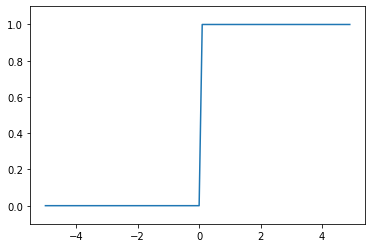

In [19]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 2.2. 시그모이드 함수

시그모이드 함수의 수식은 다음과 같다. 

$h(x) = \frac{1}{1+e^{-x}}$

시그모이드 함수를 구현하면 다음과 같다.

In [20]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [21]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

시그모이드 함수를 그래프로 그려보면 다음과 같다.

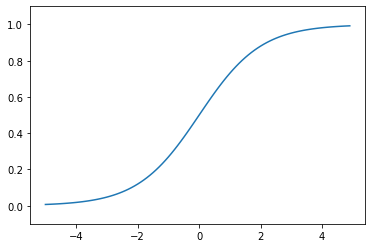

In [75]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

### 2.3. ReLU 함수

**ReLU 함수**는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수다. 

함수를 구현하면 다음과 같다.

In [32]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

In [34]:
x = np.array([-2.0, -1.0, 1.0, 2.0])
relu(x)

array([0., 0., 1., 2.])

ReLU 함수를 그래프로 그려보면 다음과 같다

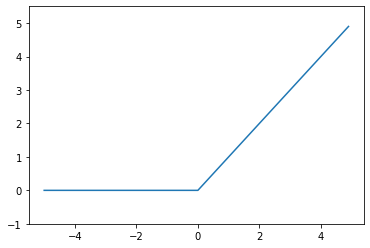

In [74]:
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

### 2.4. 비선형 함수

계단 함수와 시그모이드 함수, ReLU 함수를 **비선형 함수**라고 한다. 비선형 함수는 직선 1개로는 그릴 수 없는 함수를 뜻한다.

신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 그 이유는 선형 함수를 사용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다. 

*예를 들어 $h(x)=ax$의 선형 함수를 활성화 함수로 사용하는 3층 신경망을 구현해본다면 다음과 같다.*

*$y(x) = h(h(h(x))) = a*a*a*x$*

*즉 $y(x) = ax$의 형식으로 의미가 없다.($a = a^3$)*

## 3. 다층 신경망 구현

### 3.1. 행렬의 곱

행렬의 곱은 왼쪽 행렬의 행(가로)과 오른쪽 행렬의 열(세로)을 원소별로 곱하고 그 값들을 더해서 계산한다.

**다차원 배열을 곱할 때는 앞 행렬의 열과 뒷 행렬의 행의 크기가 같아야한다.**

이 계산을 코드로 구현하면 다음과 같다.

In [36]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

### 3.2. 3층 신경망 구현

다음과 같은 구조의 3층 신경망을 구현해보자. 

- 입력층 : 2개
- 은닉 1층 : 3개
- 은닉 2층 : 2개
- 출력층 : 2개

#### 3.2.1. 표기법

- 입력층 : $x_1, x_2$
- 은닉 1층 : $a_1^{(1)}, a_2^{(1)}, a_3^{(1)}$
- 은닉 2층 : $a_1^{(2)}, a_2^{(2)}, a_3^{(2)}$
- 출력층 : $y_1, y_2$

---
- 가중치 : $w_{다음 층 뉴런의 번호, 앞 층 뉴런의 번호}^{(다음 층)}$

ex) $x_2$ -> $a_1^{(1)}$ : $w_{12}^{(1)}$

#### 3.2.2. 각 층의 신호 전달 구현

신경망에서 $a_1^{(1)}$의 값은 다음과 같이 계산된다.

- $a_1^{(1)} = w_{11}^{(1)}*x_1 + w_{12}^{(1)}*x_2 + b_1^{(1)}$

이 수식에서 행렬의 곱을 사용하면 다음과 같이 간소화할 수 있다.

- $A^{(1)} = XW^{(1)} + B^{(1)}$

> $A^{(1)} = (a_1^{(1)}, a_2^{(1)}, a_3^{(1)})$          
> $X = (x_1, x_2)$          
> $B^{(1)} = b_1^{(1)}, b_2^{(1)}, b_3^{(1)}$                
> $W^{(1)} = \begin{pmatrix} w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\ w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} \\ \end{pmatrix}$

### 3.3. 코드 구현

아래 코드는 입력층에서 은닉 1층으로 신호를 전달하는 코드이다.

In [44]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


아래 코드는 은닉 1층에서 은닉 2층으로 신호를 전달하는 코드이다.

In [45]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


아래 코드는 은닉 2층에서 출력층으로 신호를 전달하는 코드이다.

In [46]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = A3

print(Y)

[0.31682708 0.69627909]


identity_function(x)은 입력을 그래도 출력하는 **항등 함수**이다. 

### 3.4. 구현 정리

In [48]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = A3
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


**신경망의 구현 관례**에 따라 가중치만 대문자로 쓰고, 그 외는 소문자로 작성했다.

## 4. 출력층 설계

기계학습 문제는 **분류**와 **회귀**로 나눈다.
- 분류 : 데이터가 어느 클래스에 속하는가
- 회귀 : 입력 데이터에서 연속적인 수치 예측
    
일반적으로 신경망에서 *회귀*에서는 **항등 함수**를, *분류*에서는 **소프트맥스 함수**를 사용한다.

### 4.1. 항등함수 구현

항등 함수는 입력을 그래로 출력한다. 즉 입력과 출력이 항상 같기 때문에 $y = a$로 구현된다.

### 4.2. 소프트맥스 함수 구현

소프트맥스 함수의 식은 다음과 같다.

$y_k = e^{a^{k}} / \sum_{i=1}^{n} a_i$


- $y_k$ : $k$번째 출력
- $n$ : 출력층의 뉴런 수

소프트맥스 함수를 구현하면 다음과 같다.

In [64]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [65]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


#### 4.2.1. 소프트맥스 함수 구현 시 주의점

소프트맥스 함수를 코드로 구현할 때는 오버플로우 문제를 고려해야한다. 이 문제를 해결하기 위해서는 소프트맥스 함수를 다음과 같이 변형해야한다.

$y_k = e^{a^{k}} / \sum_{i=1}^{n} a_i = Ce^{a^{k}} / C\sum_{i=1}^{n} a_i = e^{a^{k} + \log_e C} / \sum_{i=1}^{n} {(a_i+\log_e C)} =  e^{a^{k} + C^{'}} / \sum_{i=1}^{n} {(a_i+C^{'})}$ 

- $C^{'}$에는 어떤 값을 대입해도 상관없지만, 오버플로우를 막을 목적으로는 **입력 신호 중 최댓값 이용**

이를 바탕으로 소프트맥스 함수를 구현하면 다음과 같다.

In [66]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버 플로우 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [67]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


#### 4.2.2. 소프트맥스 함수의 특징

- 소프트맥스 함수의 출력은 0 ~ 1.0 사이의 실수
- **출력의 총 합은 1**

이러한 성질을 바탕으로 소프트맥스 함수의 출력을 **확률**로 해석할 수 있다.

In [69]:
a = np.array([0.3, 2.9, 4.0])
x = softmax(a)
y = np.sum(x)
print(x)
print(y)

[0.01821127 0.24519181 0.73659691]
1.0


### 4.3. 출력층 뉴런 수 정하기

출력층의 뉴런 수는 분류하고자 하는 클래스의 수로 결정한다.

### 4.4. 손글씨 숫자 인식

기계학습 문제 풀이는 **학습**과 **추론**으로 나뉜다.

- 학습 : 모델을 학습
- 추론 : 학습한 모델로 미지의 데이터에 대한 분류

신경망 역시 기계학습 문제와 동일한 과정을 거친다. 하지만 이번에는 미리 학습된 매개변수를 사용하여 학습 과정은 생략한다. 다음에 구현하는 추론 과정은 신경망의 **순전파**라고도 한다.

#### 4.4.1. MNIST 데이터 셋

**MNIST 데이터 셋**은 0 ~ 9의 숫자 이미지로 훈련 이미지가 60,000장, 시험 이미지가 10,000장 준비되어 있다.

In [79]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


코드는 다음과 같이 실행된다.

1. 부모 디렉터리의 파일을 가져올 수 있도록 설정
2. dataset/mnist.py의 load_mnist 함수 import
3. load_mnist()로 MNIST 데이터셋 읽음

- 첫 번째 실행 시 MNIST 데이터를 받아옴          
- 두 번째부터 로컬에 저장된 pickle 파일을 읽어 사용

**load_mnist()** 는 MNIST 데이터를 (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블) 형식으로 반환한다. 인수르는 bool 타입의 normalize, flatten, one_hot_label을 설정할 수 있다.

- normalize : 입력 이미지의 픽셀 값을 0.0 ~ 1.0 사이로 정규할지 결정
- flatten : 입력 이미지를 1차원 배열로 만들지 결정
- one_hot_label :정답만 1, 나머지는 0으로 설정할지 결정

MNIST  이미지를 화면으로 불러오는 코드는 다음과 같다. 이미지 표시는 PIL 모듈을 사용한다.

In [80]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) # PIL용 데이터 객체로 변환
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape) 
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


1. flatten=True를 통해 1차원 배열로 읽었기 때문에 출력하기 전에 reshape(28, 28)을 통해 다시 크기를 변형해 준다.
2. fromarray(np.uint8(img))를 통해 PIL 모듈이 사용 가능한 데이터 객체로 변환한다.

#### 4.4.2. 신경망 추론 처리

MNIST 데이터셋을 추론하는 신경망은 다음과 같이 구성한다.

- 입력층 : 784
- 은닉 1층 : 50
- 은닉 2층 : 100
- 출력층 : 10

입력층은 28\*28=784이기 때문에 784이고, 출력층은 출력 결과가 0~9로 10개이기 때문에 10이다.

In [89]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data(): # NNIST 데이터셋 읽음
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network(): # 학습된 가중치 매개변수 읽음
    with open("sample_weight.pkl", 'rb') as f: # sample_weight.pkl내에 학습된 가중치 매개변수 존재
        network = pickle.load(f)
    return network


def predict(network, x): #  신경망 구성
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


위 코드는 다음과 같이 동작한다.
1. MNIST 데이터셋을 얻고 네트워크 생성
2. x에 저장된 이미지 데이터를 1장씩 predict()로 분류
3. predict() : 각 레이블의 확률을 넘파이 배열로 반환
4. 배열에서 가장 큰 원소 인덱스 구함**(예측)**
5. 신경망이 예측한 답과 정답 레이블 비교 후 정답 카운트(accuracy_cnt)
6. 정답 카운트를 전체 이미지 숫자로 나눠 정확도 구함

위 코드에서 normalize=True로 설정했다. 이를 통해 입력 이미지 데이터에 대한 **전처리 작업**으로 **정규화**를 수행했다.
- 전처리 : 신경망의 입력 데이터에 특정 변환을 가하는 것
- 정규화 : 데이터를 특정 범위로 변환하는 처리

전처리 작업을 통해 **식별 능력 개선**과 **학습 속도 증가**의 효과를 볼 수 있다.

실제 작업에서는 **데이터의 분포**를 고려하여 전처리를 수행한다.

#### 4.4.3. 배치 처리

**배치(batch)** : 하나로 묶은 입력 데이터

배치 처리는 다음과 같은 이유로 이미지 1장당 처리 시간을 줄여준다.
1. 컴퓨터의 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있음
2. 느린 I/O를 통해 데이터를 읽는 횟수를 줄여 CPU/GPU의 계산 비율을 높임

배치 처리를 추가한 손글씨 숫자 인식 최종 코드는 다음과 같다.

In [90]:
import sys, os
sys.path.append(os.pardir) 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data(): # NNIST 데이터셋 읽음
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network(): # 학습된 가중치 매개변수 읽음
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x): #  신경망 구성
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

# 배치 처리
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


위 코드 중 배치 처리를 진행하는 코드는 다음과 같이 동작한다.
1. range()를 통해 0에서 len(x)-1까지 batch_size 간격으로 증가하는 리스트 반환
2. \[i:i+batch_size\]에서 i에서 i+batch_size까지의 입력 데이터 묶음
3. argmax()내에 axis=1을 통해 1번째 차원 원소의 최댓값을 찾음